In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ds = rasterio.open(r"Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif")

In [10]:
ds.transform * (0, 0)

(-12.849997509270906, 18.349999528378248)

In [11]:
ds.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [12]:
ds.indexes

(1,)

In [ ]:
import xml.etree.ElementTree as ET

# Path to the .tif.aux.xml file
aux_path = r"Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2019_GP.tif.aux.xml"

# Parse the XML file
tree = ET.parse(aux_path)
root = tree.getroot()

# Example: Extract projection information
projection = root.find(".//SRS").text  # Locate the SRS (Spatial Reference System) node
print("Projection Information:", projection)

# Example: Extract raster statistics
for stat in root.findall(".//MDI"):
    key = stat.attrib.get("key")
    value = stat.text
    if key in ["STATISTICS_MINIMUM", "STATISTICS_MAXIMUM", "STATISTICS_MEAN", "STATISTICS_STDDEV"]:
        print(f"{key}: {value}")


PAMDataset


AttributeError: 'NoneType' object has no attribute 'text'

In [13]:
band1 = ds.read(1)
band1 = band1.astype(np.float64)
band1

array([[-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       ...,
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38]],
      shape=(65, 46))

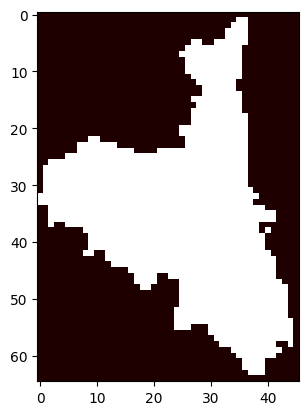

In [14]:
plt.imshow(ds.read(1).astype(np.float64), cmap='pink')

In [35]:
ds2 = rasterio.open(r"Datasets_Hackathon/Climate_Precipitation_Data/2019R.tif")

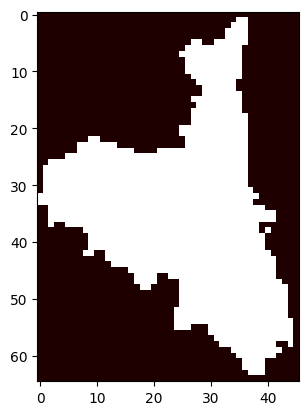

In [36]:
plt.imshow(ds2.read(1), cmap='pink')

In [37]:
rasterio.plot.show(ds2)

AttributeError: module 'rasterio' has no attribute 'plot'

In [3]:
import ee
import geemap.core as geemap

In [ ]:
sentinel_collection = ee.ImageCollection('COPERNICUS/S2_SR')

In [1]:
import rasterio
import pandas as pd
import os

In [5]:
rel_path = r"Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"

In [7]:
with rasterio.open(rel_path) as src:
    band = src.read(1)
    meta = src.meta
    print("TIFF Metadata:", meta)

def read_tfw(path=os.path.splitext(rel_path)[0] + '.tfw'):
    with open(path, "r") as f:
        params = f.readlines
    print("TFW Parameters:", params)

read_tfw()

vat_path = "".join([rel_path, ".vat"])
#df = pd.read_csv(vat_path, encoding="utf-8")
#print("VAT Dataframe:\n", df)

dbg_path = "".join([vat_path, ".dbf"])
with open(dbg_path, "r") as f:
    dbg = f.read()
print("DBG File:\n", dbg)

TIFF Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 565, 'height': 769, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(463.31271652749996, 0.0, -1378818.64438684,
       0.0, -463.31271652749996, 2036259.3891393621)}
TFW Parameters: <built-in method readlines of _io.TextIOWrapper object at 0xffb7ecdc98c0>
DBG File:
 }6
  a                      Value      N    
               Count      F                  
        266  1.00000000000e+00        303  1.00000000000e+00        315  1.00000000000e+00  